<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/TU_Dortmund/blob/main/Assignment2_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

TRUE_I = 2/np.pi  # exact integral

def phi(x):
    return np.cos(np.pi * x / 2.0)

def mc_estimate_I(N, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    x = rng.random(N)            # X ~ Uniform(0,1)
    return phi(x).mean()         # since p(x)=1 on [0,1]

In [2]:
def replicate_over_N(N_list, R=1000, seed=0):
    rng = np.random.default_rng(seed)
    means = []
    for N in N_list:
        ests = [mc_estimate_I(N, rng) for _ in range(R)]
        means.append(np.mean(ests))           # average estimate at this N
    return np.array(means)

N_list = [10**k for k in range(2, 7)]  # 1e2,1e3,1e4,1e5,1e6
avg_estimates = replicate_over_N(N_list, R=1000, seed=2025)

for N, m in zip(N_list, avg_estimates):
    print(f"N={N:>7}:  avg I_hat = {m:.6f}  abs error = {abs(m-TRUE_I):.6e}")

N=    100:  avg I_hat = 0.638798  abs error = 2.178027e-03
N=   1000:  avg I_hat = 0.636399  abs error = 2.206227e-04
N=  10000:  avg I_hat = 0.636639  abs error = 1.930728e-05
N= 100000:  avg I_hat = 0.636643  abs error = 2.317500e-05
N=1000000:  avg I_hat = 0.636601  abs error = 1.887222e-05


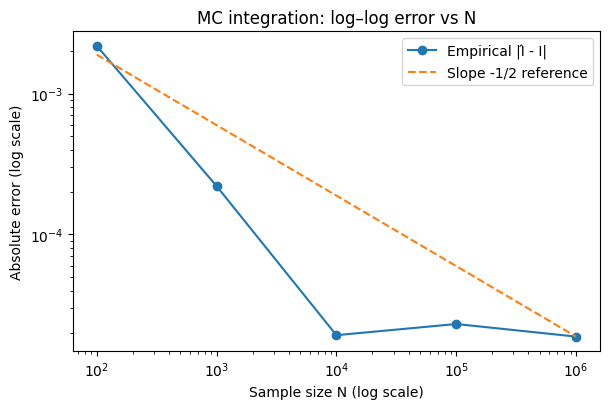

Fitted log–log slope ≈ -0.510


In [3]:
def loglog_error_plot(N_list, R=1000, seed=0, save_path=None):
    rng = np.random.default_rng(seed)
    errors = []
    for N in N_list:
        ests = [mc_estimate_I(N, rng) for _ in range(R)]
        errors.append(abs(np.mean(ests) - TRUE_I))
    N_arr = np.array(N_list, dtype=float)
    err_arr = np.array(errors, dtype=float)

    # Fit slope in log10 space
    slope, intercept = np.polyfit(np.log10(N_arr), np.log10(err_arr), 1)

    plt.figure(figsize=(6.2,4.2))
    plt.loglog(N_arr, err_arr, marker='o', linestyle='-', label='Empirical |Î - I|')
    # reference line with slope -1/2 through the last point
    ref = err_arr[-1] * (N_arr/N_arr[-1])**(-0.5)
    plt.loglog(N_arr, ref, linestyle='--', label='Slope -1/2 reference')
    plt.xlabel('Sample size N (log scale)')
    plt.ylabel('Absolute error (log scale)')
    plt.title('MC integration: log–log error vs N')
    plt.legend()
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    print(f"Fitted log–log slope ≈ {slope:.3f}")

N_list = [10**k for k in range(2, 7)]
loglog_error_plot(N_list, R=1000, seed=2025, save_path="Q2_loglog_error.png")

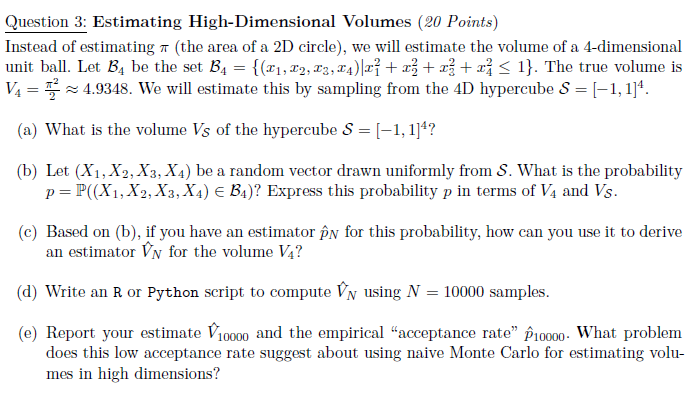

In [8]:
# (d)
# True volume of the 4D unit ball
V4_true = (np.pi**2) / 2
VS = 16.0   # volume of hypercube [-1,1]^4

def estimate_V4(N, seed=None):
    rng = np.random.default_rng(seed)
    # Sample N points uniformly from [-1,1]^4
    x = rng.uniform(-1.0, 1.0, size=(N, 4))
    # Squared radius
    r2 = np.sum(x**2, axis=1)
    # Indicator: inside 4D ball
    inside = (r2 <= 1.0)
    phat = inside.mean()      # estimate of p
    Vhat = VS * phat          # estimate of V4
    return Vhat, phat

# Run with N = 10000
N = 10_000
Vhat_10000, phat_10000 = estimate_V4(N, seed=2025)

print(f"Monte Carlo estimate V_hat = {Vhat_10000:.4f}")
print(f"True volume V4            = {V4_true:.4f}")
print(f"Empirical acceptance rate p_hat = {phat_10000:.4f}")


Monte Carlo estimate V_hat = 4.9776
True volume V4            = 4.9348
Empirical acceptance rate p_hat = 0.3111


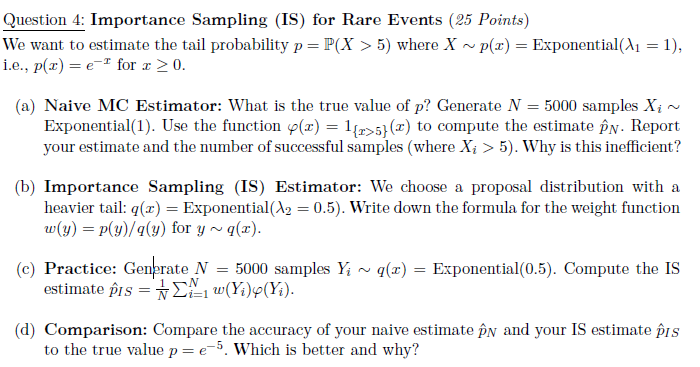

In [9]:
# True value
p_true = np.exp(-5)

# Indicator function for the rare event
def phi(x):
    return (x > 5).astype(float)

# (a) Naive Monte Carlo estimator
def naive_tail_estimate(N, seed=None):
    rng = np.random.default_rng(seed)
    x = rng.exponential(scale=1.0, size=N)   # Exp(1)
    indicators = phi(x)
    return indicators.mean(), indicators.sum()

# (b) Importance Sampling estimator (proposal: Exp(0.5))
def is_tail_estimate(N, seed=None):
    rng = np.random.default_rng(seed)
    y = rng.exponential(scale=1/0.5, size=N)  # Exp(rate 0.5)
    w = 2.0 * np.exp(-0.5 * y)                # w(y) = p(y)/q(y)
    indicators = phi(y)
    return np.mean(w * indicators)

# ---- Run for N = 5000 ----
N = 5000

p_naive, successes = naive_tail_estimate(N, seed=2025)
p_IS = is_tail_estimate(N, seed=2025)

print("True p = e^-5               =", p_true)
print("Naive MC estimate           =", p_naive)
print("Successful samples (X>5)    =", successes)
print("---------------------------------------")
print("Importance Sampling estimate =", p_IS)

True p = e^-5               = 0.006737946999085467
Naive MC estimate           = 0.0068
Successful samples (X>5)    = 34.0
---------------------------------------
Importance Sampling estimate = 0.006767269286524815
